In [1]:
import numpy as np
import h5py
import os
# import time
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
# input_path = 'run1221_r01592_R14_Z10_noshif_nolog_0'
# input_path = 'RM_1563_Rho_0.8_Z_0.8_min_400_dv_1_0829_odd'
input_path = 'date20220427_train_1563_noDIN'

In [3]:
si_path = 'result/' + input_path + '/sampleInfo_eval.csv'
# si_path = 'result/' + input_path + '/sampleInfo_even.csv'
si = pd.read_csv(si_path)
fPred = 'result/' + input_path + '/' + input_path + '.csv'
# fPred = 'result/' + input_path + '/date20220426_train_1563_noDIN.csv'
info = pd.read_csv(fPred)


In [4]:
info_numpy = np.array(info)
si_numpy = np.array(si)

In [5]:
len(info)

166204

In [6]:
preds = []
labels = []
dVertexs = []
dTs = []
vertexXs = []
vertexYs = []
vertexZs = []
for i in range(len(info_numpy)):

    label = info_numpy[i][0]
    pred = info_numpy[i][1]

    fileidx = info_numpy[i][4]
    
    filename = si_numpy[int(fileidx)][2]
    
    
    idx = info_numpy[i][5]

    
    data = h5py.File(filename,'r')

    dT = data['events']['dT'][idx]
    dVertex = data['events']['dVertex'][idx]
    vertexX = data['events']['vertexX'][idx]
    vertexY = data['events']['vertexY'][idx]
    vertexZ = data['events']['vertexZ'][idx]
    
    
    preds.append(pred)
    labels.append(label)
    dVertexs.append(dVertex)
    dTs.append(dT)
#     print(dTs.type)
    vertexXs.append(vertexX)
    vertexYs.append(vertexY)
    vertexZs.append(vertexZ)



In [7]:
preds = np.array(preds)
labels = np.array(labels)
dVertexs = np.array(dVertexs)
dTs = np.array(dTs)
vertexXs = np.array(vertexXs)
vertexYs = np.array(vertexYs)
vertexZs = np.array(vertexZs)

In [8]:
ME_label = []
ME_dVertex = []
ME_dT = []
ME_vertexX = []
ME_vertexY = []
ME_vertexZ = []
ME_pred = []


FN_label = []
FN_dVertex = []
FN_dT = []
FN_vertexX = []
FN_vertexY = []
FN_vertexZ = []
FN_pred = []

In [9]:
for i in range(len(preds)):
    if labels[i] == 1:
        ME_label.append(labels[i])
        ME_dVertex.append(dVertexs[i])
        ME_dT.append(dTs[i])
        ME_vertexX.append(vertexXs[i])
        ME_vertexY.append(vertexYs[i])
        ME_vertexZ.append(vertexZs[i])
        ME_pred.append(preds[i])
    else:
   
        FN_label.append(labels[i])
        FN_dVertex.append(dVertexs[i])
        FN_dT.append(dTs[i])
        FN_vertexX.append(vertexXs[i])
        FN_vertexY.append(vertexYs[i])
        FN_vertexZ.append(vertexZs[i])
        FN_pred.append(preds[i])

In [10]:
ME_sig = -np.log((1/np.array(ME_pred))-1)
FN_sig = -np.log((1/np.array(FN_pred))-1)

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [11]:
FN_over_0 = 100*np.sum(FN_sig > 0)/len(FN_sig)

In [12]:
ME_under_0 = 100*np.sum(ME_sig < 0)/len(ME_sig)

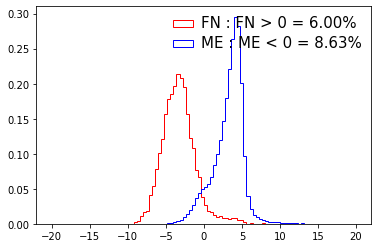

In [13]:
plt.hist(FN_sig, bins = 100, range = (-20, 20), density = True, color ='r',histtype = 'step')
plt.hist(ME_sig, bins = 100, range = (-20, 20), density = True, color ='b',histtype = 'step')
# plt.text(10, 0.15,'FN > 0' + str(FN_over_0), fontsize = 20)
# plt.text(10, 0.1, 'ME < 0' + str(ME_under_0), fontsize = 20)


FN_over = '%.2f' %FN_over_0
ME_under = '%.2f' %ME_under_0

label = ['FN : FN > 0 = '+FN_over+'%', 
         'ME : ME < 0 = '+ME_under+'%']


leg = plt.legend(label, loc = 'best', frameon=False)

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=15)
plt.setp(leg_texts, fontsize=15)

plt.title('')
plt.show()

In [14]:
num_FN = len(FN_dT)

In [15]:
num_ME = len(ME_dT)

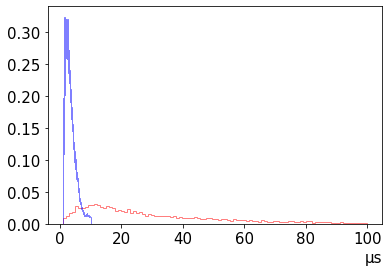

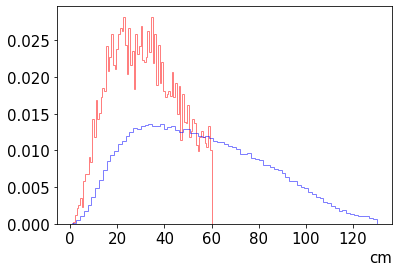

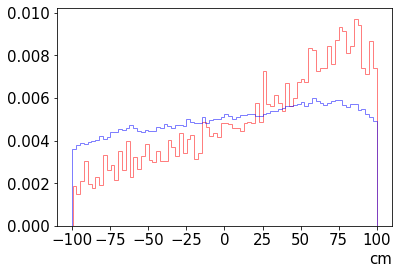

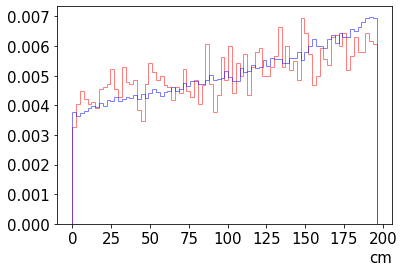

In [16]:
plt.hist(np.array(FN_dT)*0.001, bins = 100, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_dT)*0.001, bins = 100, color= 'b', alpha = 0.5, density = True, histtype = 'step')
# plt.title('dT')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("\u03BCs", fontsize=15, loc='right')

plt.show()

plt.hist(np.array(FN_dVertex)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_dVertex)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')
# plt.title('dVertex')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.show()

# plt.plot(np.array(ME_vertexX)*100, np.array(ME_vertexY)*100, '.b', alpha = 0.1)
# plt.plot(np.array(FN_vertexX)*100, np.array(FN_vertexY)*100, '.r', alpha = 0.5)
# # plt.title('vertexXY')
# plt.xlabel("cm", fontsize=15, loc='right')
# plt.show()

plt.hist(np.array(FN_vertexZ)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_vertexZ)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')
# plt.title('vertexZ')plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.show()

# plt.hist2d(FN_dVertex, FN_vertexZ, bins=50)
# plt.show()
# plt.hist2d(ME_dVertex, ME_vertexZ, bins=50)
# plt.show()
plt.hist((np.array(FN_vertexX)**2+np.array(FN_vertexY)**2)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist((np.array(ME_vertexX)**2+np.array(ME_vertexY)**2)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')
# plt.title('vertexR\u00b2')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.show()

In [17]:
list_range = np.arange(0,1,0.001)

In [18]:
for i in range(len(list_range)):
    a = len(np.array(ME_pred)[np.array(ME_pred)>list_range[i]])/len(np.array(ME_pred))
#     print(list_range[i])
    
    if (a > 0.99):
     
        eff_99 = list_range[i]
        continue
        
    if (a > 0.95):
        
        eff_95 = list_range[i]
        continue
        
    if (a > 0.90):
       
        eff_90 = list_range[i]
        continue
    

In [19]:
eff_50_ME = len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
# print(eff_50_ME)
eff_50_FN = len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))
# print(eff_50_FN)
num_50_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
# print(num_50_ME)
num_50_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))
# print(num_50_FN)

99% efficient

In [20]:
eff_99_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
# print(eff_99_ME)
eff_99_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))
# print(eff_99_FN)
num_99_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
num_99_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))
# print(num_99_ME)
# print(num_99_FN)

95% efficient

In [21]:
eff_95_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
# print(eff_95_ME)
eff_95_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))
# print(eff_95_FN)
num_95_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
num_95_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))
# print(num_95_ME)
# print(num_95_FN)

90% efficient

In [22]:
eff_90_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
# print(eff_90_ME)
eff_90_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))
# print(eff_90_FN)
num_90_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
num_90_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))
# print(num_90_ME)
# print(num_90_FN)

In [23]:
print('         |   90%   |   95%   |   99%   |   mid   |')
print('--------------------------------------------------')
print('  ME_eff |','%.4f  |'%eff_90_ME,'%.4f  |'%eff_95_ME,'%.4f  |'%eff_99_ME,'%.4f  |'%eff_50_ME)
print('--------------------------------------------------')
print('  FN_eff |','%.4f  |'%eff_90_FN,'%.4f  |'%eff_95_FN,'%.4f  |'%eff_99_FN,'%.4f  |'%eff_50_FN)
print('--------------------------------------------------')
print('ME_remain|','%7d'%int(num_90_ME),'|','%7d'%int(num_95_ME),'|','%7d'%int(num_99_ME),'|','%7d'%int(num_50_ME),'|')
print('--------------------------------------------------')
print('FN_remain|','%7d'%int(num_90_FN),'|','%7d'%int(num_95_FN),'|','%7d'%int(num_99_FN),'|','%7d'%int(num_50_FN),'|')
print('--------------------------------------------------')
print('CNN score|','','%.3f'%eff_90,' | ','%.3f'%eff_95,' | ','%.3f'%eff_99,' |  ',0.5,'  |')
print('==================================================')
print('         |   FN    |   ME    |')
print('# data   |','%7d'%len(FN_dT),'|', '%7d'%len(ME_dT),'|')

         |   90%   |   95%   |   99%   |   mid   |
--------------------------------------------------
  ME_eff | 0.9000  | 0.9502  | 0.9901  | 0.9137  |
--------------------------------------------------
  FN_eff | 0.0524  | 0.0991  | 0.2820  | 0.0600  |
--------------------------------------------------
ME_remain|  143766 |  151775 |  158160 |  145951 |
--------------------------------------------------
FN_remain|     339 |     641 |    1824 |     388 |
--------------------------------------------------
CNN score|  0.566  |  0.318  |  0.085  |   0.5   |
         |   FN    |   ME    |
# data   |    6468 |  159736 |


Evaluation and ROC

[None, None, None, None]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


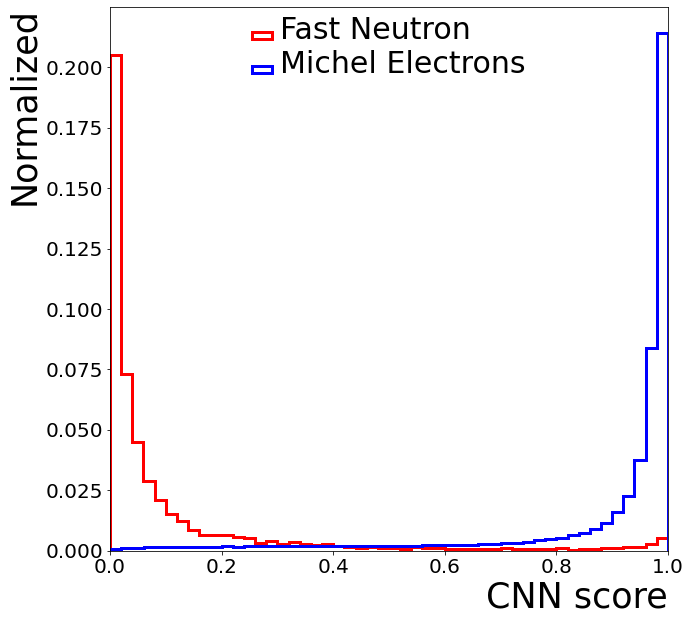

In [24]:

##### Draw ROC curve #####
from sklearn.metrics import roc_curve, roc_auc_score


from matplotlib.cbook import get_sample_data
# im = plt.imread(get_sample_data('/users/yewzzang/work/JSNS2/NuML/PSD/JSNS_image.png'))

# fig, ax = plt.subplots()

df = pd.read_csv(fPred)
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['weight'], pos_label=0)
auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['weight'])


df_bkg = df[df.label==0]
df_sig = df[df.label==1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["font.family"] = 'Helvetica'
# hbkg1 = df_bkg['prediction'].plot(kind='hist', histtype='step', weights=df_bkg['weight'], density = True, bins=np.linspace(0, 1, 50), color='red', linewidth=3)
# hsig1 = df_sig['prediction'].plot(kind='hist', histtype='step', weights=df_sig['weight'], density = True, bins=np.linspace(0, 1, 50), color='blue', linewidth=3)

plt.hist(df_bkg['prediction']*100, weights=df_bkg['weight'], histtype='step', 
         density=True, bins=50, color='red', linewidth=3)

plt.hist(df_sig['prediction']*100, weights=df_sig['weight'], histtype='step', 
         density=True, bins=50, color='blue', linewidth=3)



plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("CNN score", fontsize=35, loc='right')
plt.ylabel("Normalized", fontsize=35, loc='top')
plt.xlim(0, 100)
label = ['Fast Neutron', 'Michel Electrons']

leg = plt.legend(label, loc = 'upper center', frameon=False)

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=30)
plt.setp(leg_texts, fontsize=30)
# plt.title("JSNS\u00b2 Work in progress", fontsize = 30, loc='left', pad=20)



# newax = fig.add_axes([0.7, 0.75, 0.2, 0.2], anchor='NE', zorder=-1)
# newax.imshow(im)
# newax.axis('off')


[None, None, None, None, None, None, None, None, None, None]

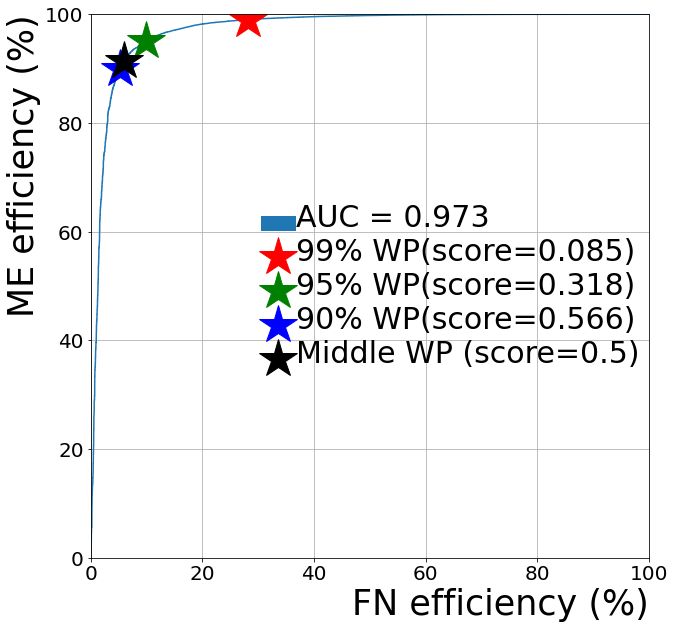

In [25]:
from matplotlib.cbook import get_sample_data

# im = plt.imread(get_sample_data('/Users/yoochanghyun/JSNS2/PSD/JSNS_image.png'))

# fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["font.family"] = 'Helvetica'



plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# plt.figure(figsize=(15,10))
plt.plot(fpr*100, tpr*100, label='AUC = %.3f' % (auc))
plt.plot(eff_99_FN*100, eff_99_ME*100,'*r', markersize=40)

plt.plot(eff_95_FN*100, eff_95_ME*100,'*g', markersize=40)

plt.plot(eff_90_FN*100, eff_90_ME*100,'*b', markersize=40)

plt.plot(eff_50_FN*100, eff_50_ME*100,'*k', markersize=40)

plt.xlabel('FN efficiency (%)', fontsize=35, loc='right')
plt.ylabel('ME efficiency (%)', fontsize=35, loc='top')



#plt.xlim(0, 0.001)
plt.xlim(0, 100)
plt.ylim(0, 100)
# plt.legend(loc = 'lower center')
# plt.savefig('result/' +args.output + '/' + args.output + '_efficiency.png', dpi=300)
plt.grid()
print_auc = '%.3f' %auc
print_eff_99 = '%.3f' %eff_99
print_eff_95 = '%.3f' %eff_95
print_eff_90 = '%.3f' %eff_90
label = ['AUC = '+print_auc,'99% WP(score='+print_eff_99+')', '95% WP(score='+print_eff_95+')', '90% WP(score='+print_eff_90+')','Middle WP (score=0.5)']

leg = plt.legend(label, loc = 'right', frameon=False)

 
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=15)
plt.setp(leg_texts, fontsize=30)
# plt.title("JSNS\u00b2 Work in progress", fontsize = 30, loc='left', pad=20)



# newax = fig.add_axes([0.7, 0.75, 0.2, 0.2], anchor='NE', zorder=-1)
# newax.imshow(im)
# newax.axis('off')


In [26]:
from scipy.stats import gaussian_kde
xy = np.vstack([np.array(FN_dT)*0.001,np.array(FN_sig)])
xy[xy==np.inf] =0
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = (np.array(FN_dT)*0.001)[idx], np.array(FN_sig)[idx], z[idx]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


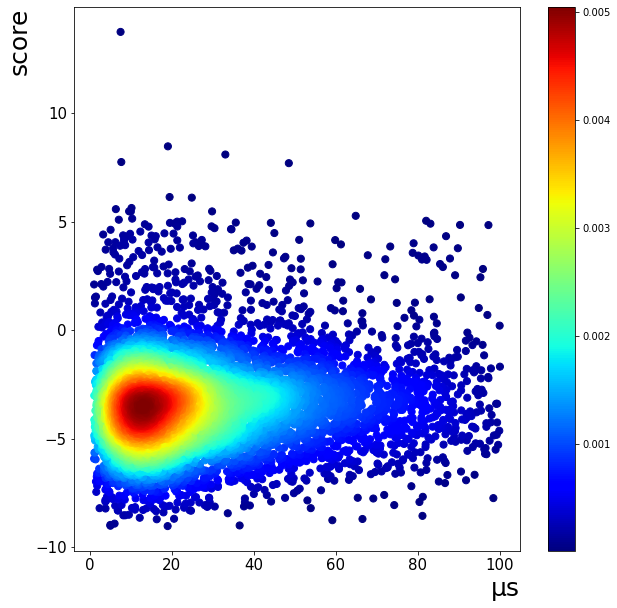

In [27]:
# plt.scatter(np.array(FN_dT)/10000,FN_sig, c = z)
# plt.figure(figsize=(8,5))
plt.scatter(x, y, c=z, s=50, cmap=plt.cm.jet)
# plt.scatter(np.array(ME_dT)/10000,ME_sig, color = 'b', alpha=0.2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("\u03BCs", fontsize=25, loc='right')
plt.ylabel("score", fontsize=25, loc='top')
plt.colorbar()
plt.show()

In [28]:

xy = np.vstack([np.array(ME_dT)*0.001,np.array(ME_sig)])
xy[xy==np.inf] =0
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = (np.array(ME_dT)*0.001)[idx], np.array(ME_sig)[idx], z[idx]

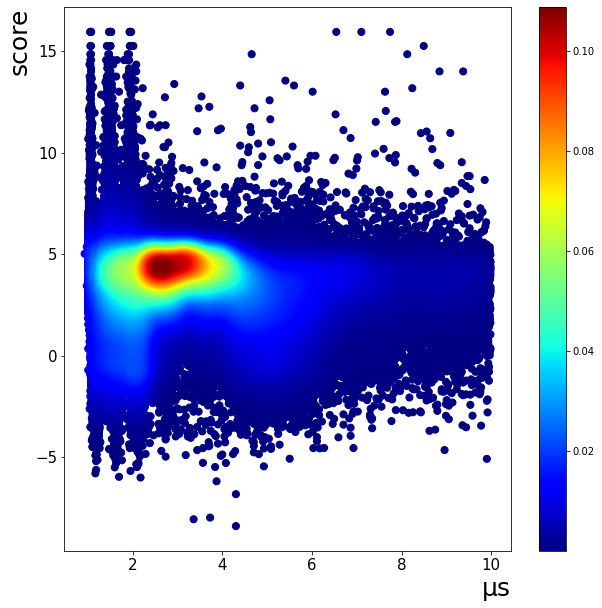

In [29]:
# plt.scatter(np.array(FN_dT)/10000,FN_sig, c = z)
# plt.figure(figsize=(8,5))
plt.scatter(x, y, c=z, s=50, cmap=plt.cm.jet)
# plt.scatter(np.array(ME_dT)/10000,ME_sig, color = 'b', alpha=0.2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("\u03BCs", fontsize=25, loc='right')
plt.ylabel("score", fontsize=25, loc='top')
# plt.ylim([-50, 50])
plt.colorbar()
plt.show()

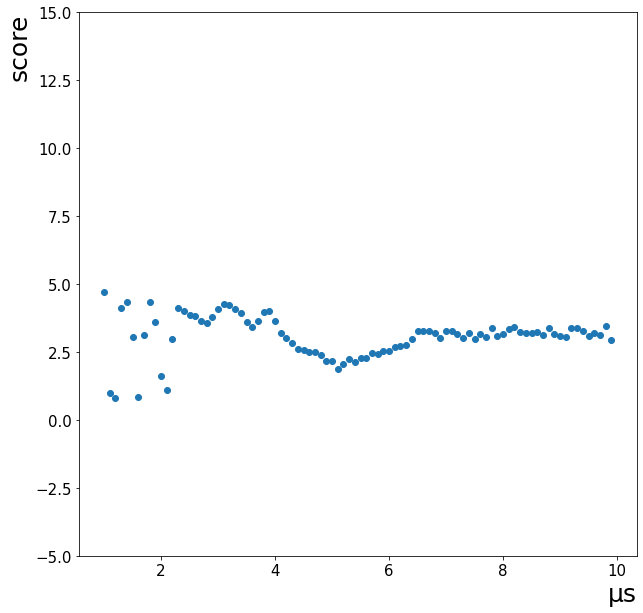

In [30]:
ME_sig = np.array(ME_sig)
ME_sig_test = ME_sig[ME_sig<100]
ME_dT_test = np.array(ME_dT)*0.001
ME_dT_test = ME_dT_test[ME_sig<100]
##### seperate range
mm = []
rr = 10
for i in range(100, 1000, rr):
#     print(i/100)
    a = np.mean(ME_sig_test[(ME_dT_test< (i/100 + 0.10)) & (ME_dT_test>(i/100))])
    mm.append(a)
tt = np.array(list(range(100, 1000, rr)))/100
plt.scatter(tt, mm)
plt.ylim([-5,15])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("\u03BCs", fontsize=25, loc='right')
plt.ylabel("score", fontsize=25, loc='top')
plt.show()

/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


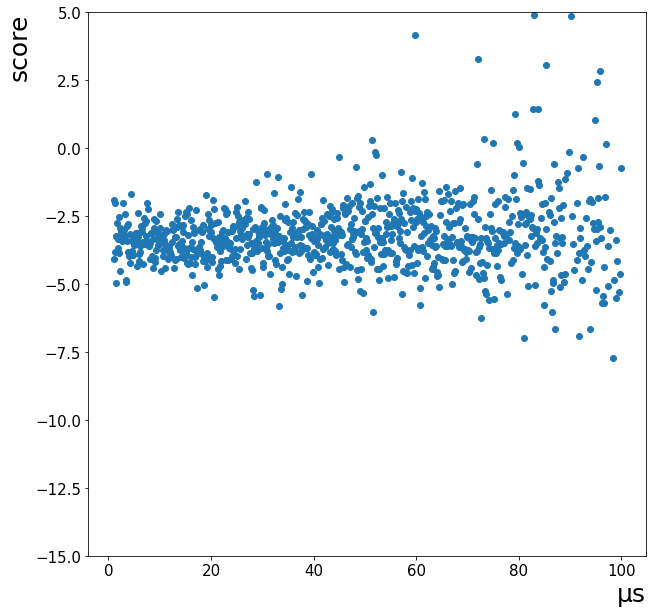

In [31]:
FN_sig = np.array(FN_sig)
FN_sig_test = FN_sig[FN_sig>-100]
FN_dT_test = np.array(FN_dT)*0.001
FN_dT_test = FN_dT_test[FN_sig>-100]
##### seperate range
mm = []
rr = 10
for i in range(100, 10000, rr):
#     print(i/100)
    a = np.mean(FN_sig_test[(FN_dT_test< (i/100 + 0.10)) & (FN_dT_test>(i/100))])
    mm.append(a)
tt = np.array(list(range(100, 10000, rr)))/100
plt.scatter(tt, mm)
plt.ylim([-15,5])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("\u03BCs", fontsize=25, loc='right')
plt.ylabel("score", fontsize=25, loc='top')
plt.show()

ValueError: autodetected range of [-9.021082015146074, inf] is not finite

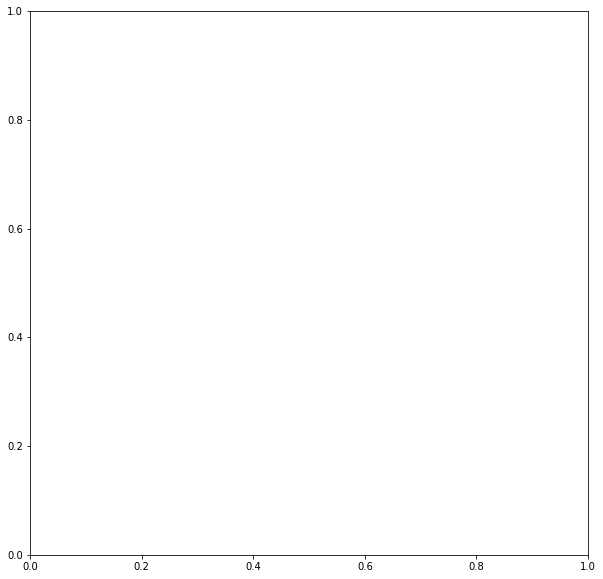

In [32]:
plt.hist2d(np.array(FN_dT)[FN_sig>-100]*0.001,np.array(FN_sig)[FN_sig>-100],(50,50))
plt.ylim([-20, 20])
plt.show()

In [ ]:

plt.hist2d(np.array(ME_dT)[ME_sig<100]*0.001,np.array(ME_sig)[ME_sig<100],(50,50))
plt.ylim([-20, 20])
plt.show()